In [108]:
# Usefull libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
import statsmodels.api as sma
from sklearn.feature_selection import RFE


# Supressing the warnings generated
import warnings
warnings.filterwarnings('ignore')

# Displaying all Columns without restrictions
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Preliminary understanding

In [2]:
df = pd.read_csv("telecom_churn_data.csv")
df.head(10)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,

In [3]:
df.shape

(99999, 226)

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [5]:
# Statistical analysis of the numerical features

df.describe().T

,count,mean,std,min,25%,50%,75%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
arpu_6,99999.0,2.829874e+02,328.439770,-2.258709e+03,9.341150e+01,1.977040e+02,3.710600e+02,2.773109e+04
arpu_7,99999.0,2.785366e+02,338.156291,-2.014045e+03,8.698050e+01,1.916400e+02,3.653445e+02,3.514583e+04
arpu_8,99999.0,2.791547e+02,344.474791,-9.458080e+02,8.412600e+01,1.920800e+02,3.693705e+02,3.354362e+04
arpu_9,99999.0,2.616451e+02,341.998630,-1.899505e+03,6.268500e+01,1.768490e+02,3.534665e+02,3.880562e+04
onnet_mou_6,96062.0,1.323959e+02,297.207406,0.000000e+00,7.380000e+00,3.431000e+01,1.187400e+02,7.376710e+03


In [6]:
# Drop columns which has 1 unique value since they possess no variance in the model

unique_col=[]
for i in df.columns:
    if df[i].nunique()== 1:
        unique_col.append(i)
    else:
        pass
    
df.drop(unique_col, axis=1, inplace =True)
print("\n The following columns are dropped as they have one unique value", unique_col)


 The following columns are dropped as they have one unique value ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [7]:
# Confirming the dimensions

df.shape

(99999, 210)

In [8]:
# Columns with datetime format is represented as object which needs correction

date_col = df.select_dtypes(include=['object'])
print("\nThese are the columns with datetime format represented as object\n", date_col.columns)

# Converting the selected columns to datetime format

for i in date_col.columns:
    df[i] = pd.to_datetime(df[i])

# Confirming the changes
df.info(verbose=True)


These are the columns with datetime format represented as object
 Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 210 columns):
 #    Column                    Dtype         
---   ------                    -----         
 0    mobile_number             int64         
 1    arpu_6                    float64       
 2    arpu_7                    float64       
 3    arpu_8                    float64       
 4    arpu_9                    float64       
 5    onnet_mou_6               float64       
 6    onnet_mou_7               float64       
 7    onnet_mou_8               float64       
 8    onnet_mou_9               float64       
 9    offnet_mou_6              float64       
 10 

### Handling the missing values

In [9]:
# Checking the overall missing values in the dataset

((df.isnull().sum()/df.shape[0])*100).round(2).sort_values(ascending=False)

max_rech_data_6             74.85
fb_user_6                   74.85
count_rech_3g_6             74.85
count_rech_2g_6             74.85
night_pck_user_6            74.85
arpu_3g_6                   74.85
total_rech_data_6           74.85
av_rech_amt_data_6          74.85
arpu_2g_6                   74.85
date_of_last_rech_data_6    74.85
arpu_3g_7                   74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
count_rech_3g_9             74.08
date_of_last_rech_data_9    74.08
count_rech_2g_9             74.08
fb_user_9                   74.08
total_rech_data_9           74.08
max_rech_data_9             74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
av_rech_amt_data_9          74.08
arpu_3g_9     

###  Columns having missing values have some meaningful attributes therefore carefully imputing and droping as per the need!

In [10]:
df[['date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6']].head(10)

,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6
0,2014-06-21,1.0,252.0
1,NaT,NaN,NaN
2,NaT,NaN,NaN
3,NaT,NaN,NaN
4,2014-06-04,1.0,56.0
5,NaT,NaN,NaN
6,NaT,NaN,NaN
7,NaT,NaN,NaN
8,NaT,NaN,NaN
9,NaT,NaN,NaN


##### If the 'total_rech_data' and the 'max_rech_data' also have missing values, the missing values in all the columns mentioned can be considered as meaningful since it signifies the case where customer has not done any recharge for mobile internet on that month. Hence we can impute 0 in that case.

In [11]:
# Conditional imputation

start_time=time.time()

for i in range(len(df)):
  # Handling 'total_rech_data', 'max_rech_data' for month 6
    if pd.isnull((df['total_rech_data_6'][i]) and (df['max_rech_data_6'][i])):
        if pd.isnull(df['date_of_last_rech_data_6'][i]):
            df['total_rech_data_6'][i]=0
            df['max_rech_data_6'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' for month 7
    if pd.isnull((df['total_rech_data_7'][i]) and (df['max_rech_data_7'][i])):
        if pd.isnull(df['date_of_last_rech_data_7'][i]):
            df['total_rech_data_7'][i]=0
            df['max_rech_data_7'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' for month 8
    if pd.isnull((df['total_rech_data_8'][i]) and (df['max_rech_data_8'][i])):
        if pd.isnull(df['date_of_last_rech_data_8'][i]):
            df['total_rech_data_8'][i]=0
            df['max_rech_data_8'][i]=0

  # Handling 'total_rech_data', 'max_rech_data' for month 9
    if pd.isnull((df['total_rech_data_9'][i]) and (df['max_rech_data_9'][i])):
        if pd.isnull(df['date_of_last_rech_data_9'][i]):
            df['total_rech_data_9'][i]=0
            df['max_rech_data_9'][i]=0

end_time = time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds")
print("The columns \n'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'\n'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9' are imputed with 0 based on the above conditions")


Execution Time =  69.49 seconds
The columns 
'total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9'
'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9' are imputed with 0 based on the above conditions


In [12]:
# Handling the attriburtes: 'count_rech_2g_' and 'count_rech_3g_'

df[['count_rech_2g_6','count_rech_3g_6','total_rech_data_6']].head(10)

,count_rech_2g_6,count_rech_3g_6,total_rech_data_6
0,0.0,1.0,1.0
1,NaN,NaN,0.0
2,NaN,NaN,0.0
3,NaN,NaN,0.0
4,1.0,0.0,1.0
5,NaN,NaN,0.0
6,NaN,NaN,0.0
7,NaN,NaN,0.0
8,NaN,NaN,0.0
9,NaN,NaN,0.0


##### From the table, values of 'total_rech_data' for each month from 6 to 9 respectively is the sum of columns 'count_rech_2g'  and 'count_rech_3g' , this will lead to multicollinearity issue. Therefore dropping both the columns for all four months.

In [13]:
# Dropping the columns 'count_rech_2g_*' & 'count_rech_3g_*'
df.drop(['count_rech_2g_6','count_rech_3g_6',
         'count_rech_2g_7','count_rech_3g_7',
         'count_rech_2g_8','count_rech_3g_8',
         'count_rech_2g_9','count_rech_3g_9'],axis=1, inplace=True)

print("The 'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9' columns are dropped as they can be explained from the 'total_rech_data'column")

The 'count_rech_2g_6','count_rech_3g_6','count_rech_2g_7','count_rech_3g_7','count_rech_2g_8','count_rech_3g_8','count_rech_2g_9','count_rech_3g_9' columns are dropped as they can be explained from the 'total_rech_data'column


In [14]:
# Current dimensions

df.shape

(99999, 202)

In [15]:
# Handling missing values for arpu_3g_ and arpu_2g_

df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].head(10)

,arpu_3g_6,arpu_2g_6,av_rech_amt_data_6
0,212.17,212.17,252.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,0.00,0.00,56.0
5,NaN,NaN,NaN
6,NaN,NaN,NaN
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [16]:
# Checking the correlation between the above mentioned columns for months 6,7,8 and 9

print("Correlation table for month 6\n\n", df[['arpu_3g_6','arpu_2g_6','av_rech_amt_data_6']].corr())
print("\nCorrelation table for month 7\n\n", df[['arpu_3g_7','arpu_2g_7','av_rech_amt_data_7']].corr())
print("\nCorrelation table for month 8\n\n", df[['arpu_3g_8','arpu_2g_8','av_rech_amt_data_8']].corr())
print("\nCorrelation table for month 9\n\n", df[['arpu_3g_9','arpu_2g_9','av_rech_amt_data_9']].corr())

Correlation table for month 6

                     arpu_3g_6  arpu_2g_6  av_rech_amt_data_6
arpu_3g_6            1.000000   0.932232            0.809695
arpu_2g_6            0.932232   1.000000            0.834065
av_rech_amt_data_6   0.809695   0.834065            1.000000

Correlation table for month 7

                     arpu_3g_7  arpu_2g_7  av_rech_amt_data_7
arpu_3g_7            1.000000   0.930366            0.796131
arpu_2g_7            0.930366   1.000000            0.815933
av_rech_amt_data_7   0.796131   0.815933            1.000000

Correlation table for month 8

                     arpu_3g_8  arpu_2g_8  av_rech_amt_data_8
arpu_3g_8            1.000000   0.924925            0.787165
arpu_2g_8            0.924925   1.000000            0.805482
av_rech_amt_data_8   0.787165   0.805482            1.000000

Correlation table for month 9

                     arpu_3g_9  arpu_2g_9  av_rech_amt_data_9
arpu_3g_9            1.000000   0.852253            0.722932
arpu_2g_9      

##### Attributes `arpu_2g_` and `arpu_3g_` are highly correlated to the attribute `av_rech_amt_data_` for each month from 6 to 9 respectively. Therefore it is in best interest to drop these values.

In [17]:
df.drop(['arpu_3g_6','arpu_2g_6',
                  'arpu_3g_7','arpu_2g_7',
                  'arpu_3g_8','arpu_2g_8',
                  'arpu_3g_9','arpu_2g_9'],axis=1, inplace=True)
print("\nThe columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation\n")


The columns'arpu_3g_6','arpu_2g_6','arpu_3g_7','arpu_2g_7','arpu_3g_8','arpu_2g_8','arpu_3g_9','arpu_2g_9' are dropped from the dataset due to high corellation



In [18]:
# The column fb_user_ and night_pck_user_ have missing values above 50% and does not add any insights to our analysis. 
# Therefore we can drop these columns for further analysis.

df.drop(['fb_user_6','fb_user_7','fb_user_8','fb_user_9',
                  'night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9'],
                  axis=1, inplace=True)
print("\nThe columns 'fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9' are dropped from the dataset as it does not provide any meaning to the data")


The columns 'fb_user_6','fb_user_7','fb_user_8','fb_user_9','night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9' are dropped from the dataset as it does not provide any meaning to the data


In [19]:
# Checking the columns values

df[['av_rech_amt_data_7','max_rech_data_7','total_rech_data_7']].head(10)

,av_rech_amt_data_7,max_rech_data_7,total_rech_data_7
0,252.0,252.0,1.0
1,154.0,154.0,1.0
2,NaN,0.0,0.0
3,NaN,0.0,0.0
4,NaN,0.0,0.0
5,NaN,0.0,0.0
6,NaN,0.0,0.0
7,NaN,0.0,0.0
8,177.0,154.0,2.0
9,154.0,154.0,1.0


##### We can conclusivley replace 0 for NaN values in 'av_rech_amt_data_' column if  'total_rech_data_' is also 0. Since average contain value insights for both these columns.

In [20]:
# Performing conditional imputation
start_time = time.time()
for i in range(len(df)):
  # Handling `av_rech_amt_data`  for month 6
    if (pd.isnull(df['av_rech_amt_data_6'][i]) and (df['total_rech_data_6'][i]==0)):
        df['av_rech_amt_data_6'][i] = 0

  # Handling `av_rech_amt_data`  for month 7
    if (pd.isnull(df['av_rech_amt_data_7'][i]) and (df['total_rech_data_7'][i]==0)):
        df['av_rech_amt_data_7'][i] = 0

  # Handling `av_rech_amt_data`  for month 8
    if (pd.isnull(df['av_rech_amt_data_8'][i]) and (df['total_rech_data_8'][i]==0)):
        df['av_rech_amt_data_8'][i] = 0

  # Handling `av_rech_amt_data`  for month 9
    if (pd.isnull(df['av_rech_amt_data_9'][i]) and (df['total_rech_data_9'][i]==0)):
        df['av_rech_amt_data_9'][i] = 0


end_time=time.time()
print("\nExecution Time = ", round(end_time-start_time,2),"seconds")
print("\nThe columns 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8' and 'av_rech_amt_data_9' are replaced with 0 based on the condition\n")



Execution Time =  32.98 seconds

The columns 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8' and 'av_rech_amt_data_9' are replaced with 0 based on the condition



In [21]:
# Dropping the column 'date_of_last_rech_data' for all the months, 
# The above imputation will take care of insights for analysis as to whether the customers have used the services or not in the specified month.

df.drop(["date_of_last_rech_data_6","date_of_last_rech_data_7",
                   "date_of_last_rech_data_8","date_of_last_rech_data_9"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it provides no significance\n")


The columns 'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9' are dropped as it provides no significance



In [22]:
# Further dropping datetime columns

df.drop(["date_of_last_rech_6","date_of_last_rech_7",
                   "date_of_last_rech_8","date_of_last_rech_9"], axis=1, inplace=True)
print("\nThe columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9' are dropped as it has no significance to the data\n")


The columns 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9' are dropped as it has no significance to the data



In [23]:
# Current dimesnion

df.shape

(99999, 178)

##### Till now we have dealt with all the attributes with missing values more than 50% !!

### Segregating High Value customers

In [24]:
# Filtering the data in accordance with total revenue generated per customer.

# Calculating the total recharge amount spent on data done in month 6 and 7
df['total_rech_amt_data_6']= df['av_rech_amt_data_6'] * df['total_rech_data_6']
df['total_rech_amt_data_7']= df['av_rech_amt_data_7'] * df['total_rech_data_7']

# Calculating the overall recharge amount spent for the months 6 and 7
df['overall_rech_amt_6'] = df['total_rech_amt_data_6'] + df['total_rech_amt_6']
df['overall_rech_amt_7'] = df['total_rech_amt_data_7'] + df['total_rech_amt_7']

# Calculating the average recharge done by customer in months June and July(i.e. 6th and 7th month)
df['avg_rech_amt_6_7'] = (df['overall_rech_amt_6'] + df['overall_rech_amt_7'])/2

# Finding the value of 70th percentile in the overall revenues defining the high value customer creteria for the company
cut_off = df['avg_rech_amt_6_7'].quantile(0.70)
print("\nThe 70th quantile value to determine the High Value Customer is: ",cut_off,"\n")

# Filtering the data to the top 30% considered as High Value Customer
df = df[df['avg_rech_amt_6_7'] >= cut_off]


The 70th quantile value to determine the High Value Customer is:  478.0 



In [25]:
# Current dimension

df.shape

(30001, 183)

##### Now the total number of customers are limited to 30000 as High Value Customers

In [26]:
# Checking the missing value in HVC group

((df.isnull().sum()/df.shape[0])*100).round(2).sort_values(ascending=False)

loc_ic_t2f_mou_9         6.34
spl_og_mou_9             6.34
loc_og_t2m_mou_9         6.34
loc_og_t2f_mou_9         6.34
loc_ic_t2t_mou_9         6.34
isd_og_mou_9             6.34
loc_og_t2t_mou_9         6.34
loc_ic_t2m_mou_9         6.34
std_og_t2t_mou_9         6.34
roam_og_mou_9            6.34
std_og_mou_9             6.34
loc_ic_mou_9             6.34
std_ic_t2t_mou_9         6.34
roam_ic_mou_9            6.34
loc_og_t2c_mou_9         6.34
std_ic_t2m_mou_9         6.34
offnet_mou_9             6.34
std_ic_t2f_mou_9         6.34
std_og_t2f_mou_9         6.34
std_ic_mou_9             6.34
onnet_mou_9              6.34
spl_ic_mou_9             6.34
loc_og_mou_9             6.34
isd_ic_mou_9             6.34
std_og_t2m_mou_9         6.34
ic_others_9              6.34
og_others_9              6.34
std_og_mou_8             3.91
isd_og_mou_8             3.91
std_og_t2f_mou_8         3.91
std_ic_t2t_mou_8         3.91
og_others_8              3.91
loc_ic_t2t_mou_8         3.91
loc_ic_t2m

#### As we can see there are many columns having missing values which can't be dealt individually therefore, using advanced imputation technique KNNImputer

In [27]:
# Seperating the numerical columns
num_col = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()

In [28]:
# Loading the scaling function
scalar = StandardScaler()

# Scaling and transforming the data for numerical columns
df[num_col] = scalar.fit_transform(df[num_col])

# Calling KNNImputer function
knn = KNNImputer(n_neighbors=3)

#Imputing the NaN values
start_time = time.time()

df_knn = pd.DataFrame(knn.fit_transform(df[num_col]))
df_knn.columns = df[num_col].columns

end_time = time.time()
print("\nExecution Time = ", round(end_time-start_time,2), "seconds\n")


Execution Time =  143.06 seconds



In [29]:
# The above method has replaced all the null values in numerical columns using K-means algorithm
# Confirming the chnages

df_knn.isnull().sum()

mobile_number            0
arpu_6                   0
arpu_7                   0
arpu_8                   0
arpu_9                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
onnet_mou_9              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
offnet_mou_9             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_ic_mou_9            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
roam_og_mou_9            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2t_mou_9         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2m_mou_9         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2f_mou_9         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_t2c_mou_9         0
l

In [30]:
# Restoring the scalled values to its original form as it was done for handling null values

df[num_col]= scalar.inverse_transform(df_knn)
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7
0,7.000843e+09,197.385,214.816,213.803,21.100,6.376667,1.336667,-2.842171e-14,0.026667,0.553333,0.00,0.00,1.780000,-3.552714e-15,0.00,0.00,0.0,0.293333,0.00,0.00,0.0,6.376667,1.336667,0.00,-1.421085e-14,0.00,0.00,0.00,1.780000,0.22,0.00,0.00,0.000000,-2.220446e-16,0.0,0.00,0.000000,6.596667,1.336667,0.00,1.780000,0.00,-2.842171e-14,0.00,0.026667,0.003333,0.00,0.00,0.00,-2.220446e-16,-2.220446e-16,0.00,2.220446e-16,0.003333,-5.684342e-14,0.00,0.026667,0.0,0.00,0.00,0.0,0.033333,0.0,0.00,0.000000,1.716667,0.0,0.0,-1.387779e-17,0.00,0.00,0.00,0.00,0.00,0.02,0.16,0.066667,0.57,4.003333,4.13,3.656667,0.00,0.00,1.15,0.000000,0.57,4.026667,5.44,3.723333,0.00,0.143333,0.00,-1.776357e-15,-3.552714e-15,-3.552714e-15,3.552714e-15,0.00,0.00,4.440892e-16,0.00,0.0,0.00,0.143333,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.026667,0.0,0.303333,0.00,0.00,0.00,0.0,0.046667,0.303333,0.00,0.000000,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.000000e+00,1.0,1.000000e+00,2.220446e-16,252.0,252.0,252.0,0.0,252.0,252.0,2.520000e+02,-1.421085e-14,30.13,1.32,5.750000e+00,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000e+00,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0
7,7.000702e+09,1069.180,1349.850,3171.480,500.0

In [31]:
# Further checking overall missing values in the dataset

((df.isnull().sum()/df.shape[0])*100).round(2).sort_values(ascending=False)

mobile_number            0.0
isd_ic_mou_8             0.0
ic_others_6              0.0
ic_others_7              0.0
ic_others_8              0.0
ic_others_9              0.0
total_rech_num_6         0.0
total_rech_num_7         0.0
total_rech_num_8         0.0
total_rech_num_9         0.0
total_rech_amt_6         0.0
total_rech_amt_7         0.0
total_rech_amt_8         0.0
total_rech_amt_9         0.0
max_rech_amt_6           0.0
max_rech_amt_7           0.0
max_rech_amt_8           0.0
max_rech_amt_9           0.0
last_day_rch_amt_6       0.0
last_day_rch_amt_7       0.0
last_day_rch_amt_8       0.0
isd_ic_mou_9             0.0
isd_ic_mou_7             0.0
total_rech_data_6        0.0
isd_ic_mou_6             0.0
std_ic_t2m_mou_7         0.0
std_ic_t2m_mou_8         0.0
std_ic_t2m_mou_9         0.0
std_ic_t2f_mou_6         0.0
std_ic_t2f_mou_7         0.0
std_ic_t2f_mou_8         0.0
std_ic_t2f_mou_9         0.0
std_ic_mou_6             0.0
std_ic_mou_7             0.0
std_ic_mou_8  

### Churn Variable

##### As per the instruction we will be using the usage-based definition to define churn

##### For tagging churners we need to derive churn variable using total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9

In [32]:
# Selecting the above mentioned columns

churn_col = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
df[churn_col].info()

<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, 0 to 99997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_ic_mou_9  30001 non-null  float64
 1   total_og_mou_9  30001 non-null  float64
 2   vol_2g_mb_9     30001 non-null  float64
 3   vol_3g_mb_9     30001 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [33]:
# Initializing the churn variable.
df['churn']=0

# Imputing the churn values as 1 where their is any activity or else 0 if sum of all rows is 0 in provided columns!!
df['churn'] = np.where(df[churn_col].sum(axis=1) == 0, 1, 0)

In [34]:
df.head(10)

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
0,7.000843e+09,197.385,214.816,213.803,21.100,6.376667,1.336667,-2.842171e-14,0.026667,0.553333,0.00,0.00,1.780000,-3.552714e-15,0.00,0.00,0.0,0.293333,0.00,0.00,0.0,6.376667,1.336667,0.00,-1.421085e-14,0.00,0.00,0.00,1.780000,0.22,0.00,0.00,0.000000,-2.220446e-16,0.0,0.00,0.000000,6.596667,1.336667,0.00,1.780000,0.00,-2.842171e-14,0.00,0.026667,0.003333,0.00,0.00,0.00,-2.220446e-16,-2.220446e-16,0.00,2.220446e-16,0.003333,-5.684342e-14,0.00,2.666667e-02,0.00,0.00,0.00,0.00,0.033333,0.00,0.00,0.000000,1.716667,0.0,0.0,-1.387779e-17,0.00,0.00,0.00,0.00,0.00,0.02,0.16,0.066667,0.57,4.003333,4.13,3.656667,0.00,0.00,1.15,0.000000,0.57,4.026667,5.44,3.723333,0.00,0.143333,0.00,-1.776357e-15,-3.552714e-15,-3.552714e-15,3.552714e-15,0.00,0.00,4.440892e-16,0.00,0.00,0.00,0.143333,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.026667,0.0,0.303333,0.00,0.00,0.00,0.00,0.046667,0.303333,0.00,0.000000,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.000000e+00,1.0,1.000000e+00,2.220446e-16,252.0,252.0,252.0,0.0,252.0,252.0,2.520000e+02,-1.421085e-14,30.13,1.32,5.750000e+00,0.00,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000e+00,1.0,0.0,0.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,1
7,7.000702e+09,1069.180,1349.8

churn
0    91.863605
1     8.136395
Name: count, dtype: float64


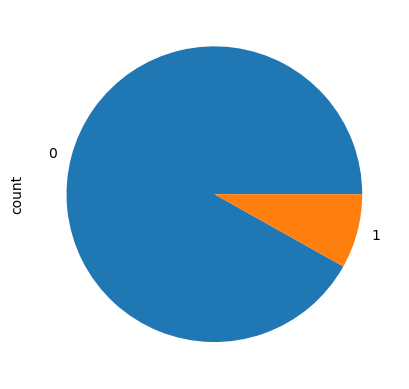

In [35]:
# Finding the churn/non churn percentage

print((df['churn'].value_counts()/len(df))*100)
((df['churn'].value_counts()/len(df))*100).plot(kind="pie")
plt.show()

##### Since 91% of customers do not churn, their is clear possibility of class imbalance

In [36]:
# Further dropping the columns with suffix _9 as it is our target variable
# Hence selecting all the churn phase columns in order to drop it

churn_drop_col = [col for col in df.columns if '_9' in col]
print("Following columns are dropped:\n", churn_drop_col)

Following columns are dropped:
 ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [37]:
# Applying the operation

df.drop(churn_drop_col, axis =1, inplace=True)
df.shape

(30001, 141)

##### We can still clean the data by few more columns related to good phase _6, _7 since we have already clubbed the insight into separate column earlier

In [38]:
# Dropping few more columns

df.drop(['total_rech_amt_data_6','av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'total_rech_amt_data_7','av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1, inplace=True)

In [39]:
df.shape

(30001, 133)

#### Lets check the collinearity of independent variable and try to understand dependencies


In [40]:
# Creating a list

month_6 = [col for col in df.columns if '_6' in col]
month_7 = [col for col in df.columns if '_7' in col]
month_8 = [col for col in df.columns if '_8' in col]

In [41]:
# Check the correlations (Higher than 0.8 and less then -0.8) and drop highly correlated values

df_corr = df.corr()
df_corr.loc[:,:] = np.tril(df_corr, k=-1)
df_corr = df_corr.stack()
df_corr
df_corr[(df_corr > 0.80) | (df_corr < -0.80)].sort_values(ascending=False)

total_rech_amt_8    arpu_8                0.955351
isd_og_mou_8        isd_og_mou_7          0.944457
                    isd_og_mou_6          0.930503
isd_og_mou_7        isd_og_mou_6          0.920866
sachet_2g_8         total_rech_data_8     0.900629
total_ic_mou_6      loc_ic_mou_6          0.895454
total_ic_mou_8      loc_ic_mou_8          0.893285
total_ic_mou_7      loc_ic_mou_7          0.883040
std_og_t2t_mou_8    onnet_mou_8           0.860462
std_og_t2t_mou_7    onnet_mou_7           0.860210
std_og_t2t_mou_6    onnet_mou_6           0.859718
avg_rech_amt_6_7    overall_rech_amt_7    0.856275
std_og_t2m_mou_7    offnet_mou_7          0.854670
std_og_t2m_mou_8    offnet_mou_8          0.851098
total_og_mou_8      std_og_mou_8          0.850122
total_og_mou_7      std_og_mou_7          0.849147
loc_ic_mou_8        loc_ic_t2m_mou_8      0.847547
std_ic_mou_8        std_ic_t2m_mou_8      0.845395
loc_ic_mou_6        loc_ic_t2m_mou_6      0.844476
loc_og_mou_8        loc_og_mou_

In [42]:
# Opting the criteria for collinearity to 85% and dropping columns with correlations more than that.

col_to_drop = ['total_rech_amt_8','isd_og_mou_8','isd_og_mou_7','sachet_2g_8','total_ic_mou_6',
            'total_ic_mou_8','total_ic_mou_7','std_og_t2t_mou_6','std_og_t2t_mou_8','std_og_t2t_mou_7',
            'std_og_t2m_mou_7','std_og_t2m_mou_8',]

df.drop(col_to_drop, axis=1, inplace=True)

In [43]:
df.shape

(30001, 121)

In [44]:
df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn
0,7.000843e+09,197.385,214.816,213.803,6.376667,1.336667,-2.842171e-14,0.553333,0.00,0.00,-3.552714e-15,0.00,0.00,0.293333,0.00,0.00,6.376667,1.336667,0.00,0.00,0.00,0.00,0.22,0.00,0.00,-2.220446e-16,0.0,0.00,6.596667,1.336667,0.00,0.003333,-2.220446e-16,-2.220446e-16,0.00,0.003333,-5.684342e-14,0.00,0.0,0.033333,0.0,0.00,1.716667,0.0,0.0,0.00,0.00,0.00,0.00,0.02,0.16,0.57,4.003333,4.13,0.00,0.00,1.15,0.57,4.026667,5.44,0.00,0.143333,0.00,-3.552714e-15,-3.552714e-15,3.552714e-15,0.00,4.440892e-16,0.00,0.00,0.143333,0.00,0.00,0.026667,0.0,0.00,0.00,0.00,0.046667,0.303333,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.000000e+00,252.0,252.0,252.0,2.520000e+02,30.13,1.32,5.750000e+00,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.000000e+00,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1
7,7.000702e+09,1069.180,1349.850,3171.480,57.840000,54.680000,5.229000e+01,453.430000,567.16,325.91,1.623000e+01,33.49,31.64,23.740000,12.59,38.06,51.390000,31.380000,40.28,308.63,447.38,162.28,62.13,55.14,53.23,-2.220446e-16,0.0,0.00,422.160000,533.910000,255.79,49.890000,6.660000e+00,2.008000e+01,16.68,60.860000,7.514000e+01,77.84,0.0,4.500000,0.0,6.50,0.000000,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.490000,121.19,152.16,101.46,39.53,427.88,355.230000,188.04,36.89,11.830000,30.39,9.144000e+01,1.269900e+02,1.413300e+02,52.19,3.424000e+01,22.21,180.54,173.080000,193.94,0.21,0.000000,0.0,2.06,14.53,31.59,15.740000,15.190000,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,-2.220446e-16,0.0,0.0,0.0,-1.421085e-14,0.00,0.00,1.421085e-14,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,-2.775558e-17,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0,1
8,7.001525e+09,378.721,492.223,137.362,413.690000,351.030000,3.508000e+01,94.660000,80.63,136.48,0.000000e+00,0.00,0.00,0.000000,0.00,0.00,297.130000,217.590000,12.49,80.96,70.58,50.54,0.00,0.00,0.00,-2.220446e-16,0.0,7.15,378.090000,288.180000,63.04,13.690000,-2.220446e-16,-2.220446e-16,0.00,130.260000,1.434800e+02,98.28,0.0,0.000000,0.0,10.23,0.000000,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.980000,15.48,0.00,0.00,0.00,81.43,23.830000,15.79,0.00,0.580000,0.10,2.243000e+01,4.080000e+00,6.500000e-01,0.00,4.440892e-16,0.00,22.43,4.660000,0.75,0.

### EDA

### Deriving new variables for better understanding and readability of data

##### 'aon': Age on Network. This can be use to derive new variable w.r.t. churn

In [45]:
# Based on that creating a new variable 'duration'
df['duration'] = (df['aon']/30).round(0)

# Dropping 'aon'
df.drop('aon', axis=1, inplace=True)

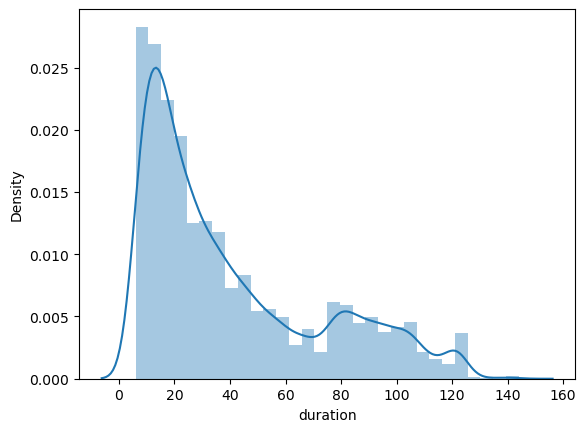

In [46]:
# Looking the distribution of 'duration'
sns.distplot(df['duration'], bins=30)
plt.show()

##### Maximum user density is between 15 to 40 months of usage

In [47]:
# Tranfroming it further for better readablity
# Creating a copy of original dataframe for visualisation

new_df = df.copy()
d_range = [0, 6, 12, 24, 60, 61]
d_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
new_df['duration_range'] = pd.cut(new_df['duration'], d_range, labels = d_label)
new_df['duration_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: duration_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

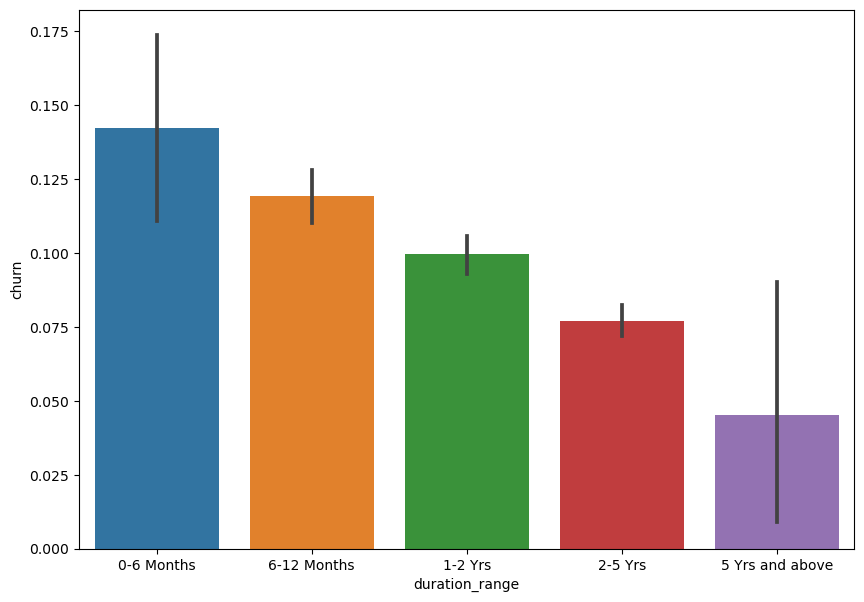

In [48]:
# Plotting a bar plot for duration range

plt.figure(figsize=[10,7])
sns.barplot(x='duration_range',y='churn', data=new_df)
plt.show()

##### We can see that the maximum churn rate is for users whose usage of network varies bewteen 0-6 months and decreases gradually.

##### Further the average revenue per user in good phase is provided by arpu_6 and arpu_7 i.e. average revenue per user. Therefore taking average for these columns and dropping the original columns from dataframe: df

In [49]:
# Performing the above opeartion

df['avg_arpu_good_phase'] = (df['arpu_6'] + df['arpu_7'])/2
df['avg_arpu_good_phase'].head()

0      206.1005
7     1209.5150
8      435.4720
21     556.1030
23     134.1235
Name: avg_arpu_good_phase, dtype: float64

In [50]:
# Drop the original column
df.drop(['arpu_6', 'arpu_7'], axis=1, inplace=True)

# Confirming the changes
df.shape

(30001, 120)

In [51]:
df.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,duration,avg_arpu_good_phase
0,7.000843e+09,213.803,6.376667,1.336667,-2.842171e-14,0.553333,0.00,0.00,-3.552714e-15,0.00,0.00,0.293333,0.00,0.00,6.376667,1.336667,0.00,0.00,0.00,0.00,0.22,0.00,0.00,-2.220446e-16,0.0,0.00,6.596667,1.336667,0.00,0.003333,-2.220446e-16,-2.220446e-16,0.00,0.003333,-5.684342e-14,0.00,0.0,0.033333,0.0,0.00,1.716667,0.0,0.0,0.00,0.00,0.00,0.00,0.02,0.16,0.57,4.003333,4.13,0.00,0.00,1.15,0.57,4.026667,5.44,0.00,0.143333,0.00,-3.552714e-15,-3.552714e-15,3.552714e-15,0.00,4.440892e-16,0.00,0.00,0.143333,0.00,0.00,0.026667,0.0,0.00,0.00,0.00,0.046667,0.303333,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.000000e+00,252.0,252.0,252.0,2.520000e+02,30.13,1.32,5.750000e+00,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.000000e+00,1.0,0.0,0.0,0.0,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1,32.0,206.1005
7,7.000702e+09,3171.480,57.840000,54.680000,5.229000e+01,453.430000,567.16,325.91,1.623000e+01,33.49,31.64,23.740000,12.59,38.06,51.390000,31.380000,40.28,308.63,447.38,162.28,62.13,55.14,53.23,-2.220446e-16,0.0,0.00,422.160000,533.910000,255.79,49.890000,6.660000e+00,2.008000e+01,16.68,60.860000,7.514000e+01,77.84,0.0,4.500000,0.0,6.50,0.000000,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.490000,121.19,152.16,101.46,39.53,427.88,355.230000,188.04,36.89,11.830000,30.39,9.144000e+01,1.269900e+02,1.413300e+02,52.19,3.424000e+01,22.21,180.54,173.080000,193.94,0.21,0.000000,0.0,2.06,14.53,31.59,15.740000,15.190000,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,-2.220446e-16,0.0,0.0,0.0,-1.421085e-14,0.00,0.00,1.421085e-14,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,-2.775558e-17,0.0,0.0,0.0,0.0,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0,1,27.0,1209.5150
8,7.001525e+09,137.362,413.690000,351.030000,3.508000e+01,94.660000,80.63,136.48,0.000000e+00,0.00,0.00,0.000000,0.00,0.00,297.130000,217.590000,12.49,80.96,70.58,50.54,0.00,0.00,0.00,-2.220446e-16,0.0,7.15,378.090000,288.180000,63.04,13.690000,-2.220446e-16,-2.220446e-16,0.00,130.260000,1.434800e+02,98.28,0.0,0.000000,0.0,10.23,0.000000,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.980000,15.48,0.00,0.00,0.00,81.43,23.830000,15.79,0.00,0.580000,0.10,2.243000e+01,4.080000e+00,6.500000e-01,0.00,4.440892e-16,0.00,22.43,4.660000,0.75,0.00,0.000000,0.0,0.00,0

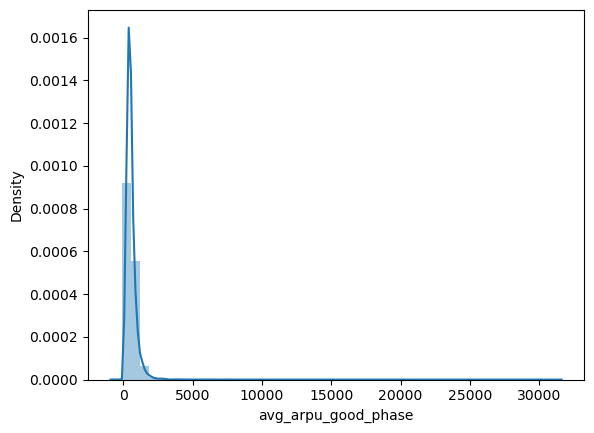

In [52]:
# Visualizing the columns created above

sns.distplot(df['avg_arpu_good_phase'])
plt.show()

##### Most of the revenue lies within the range of Rs 0 to 2000 per customers in the good phase

Text(0.5, 1.0, 'Features Correlation with Churn variable')

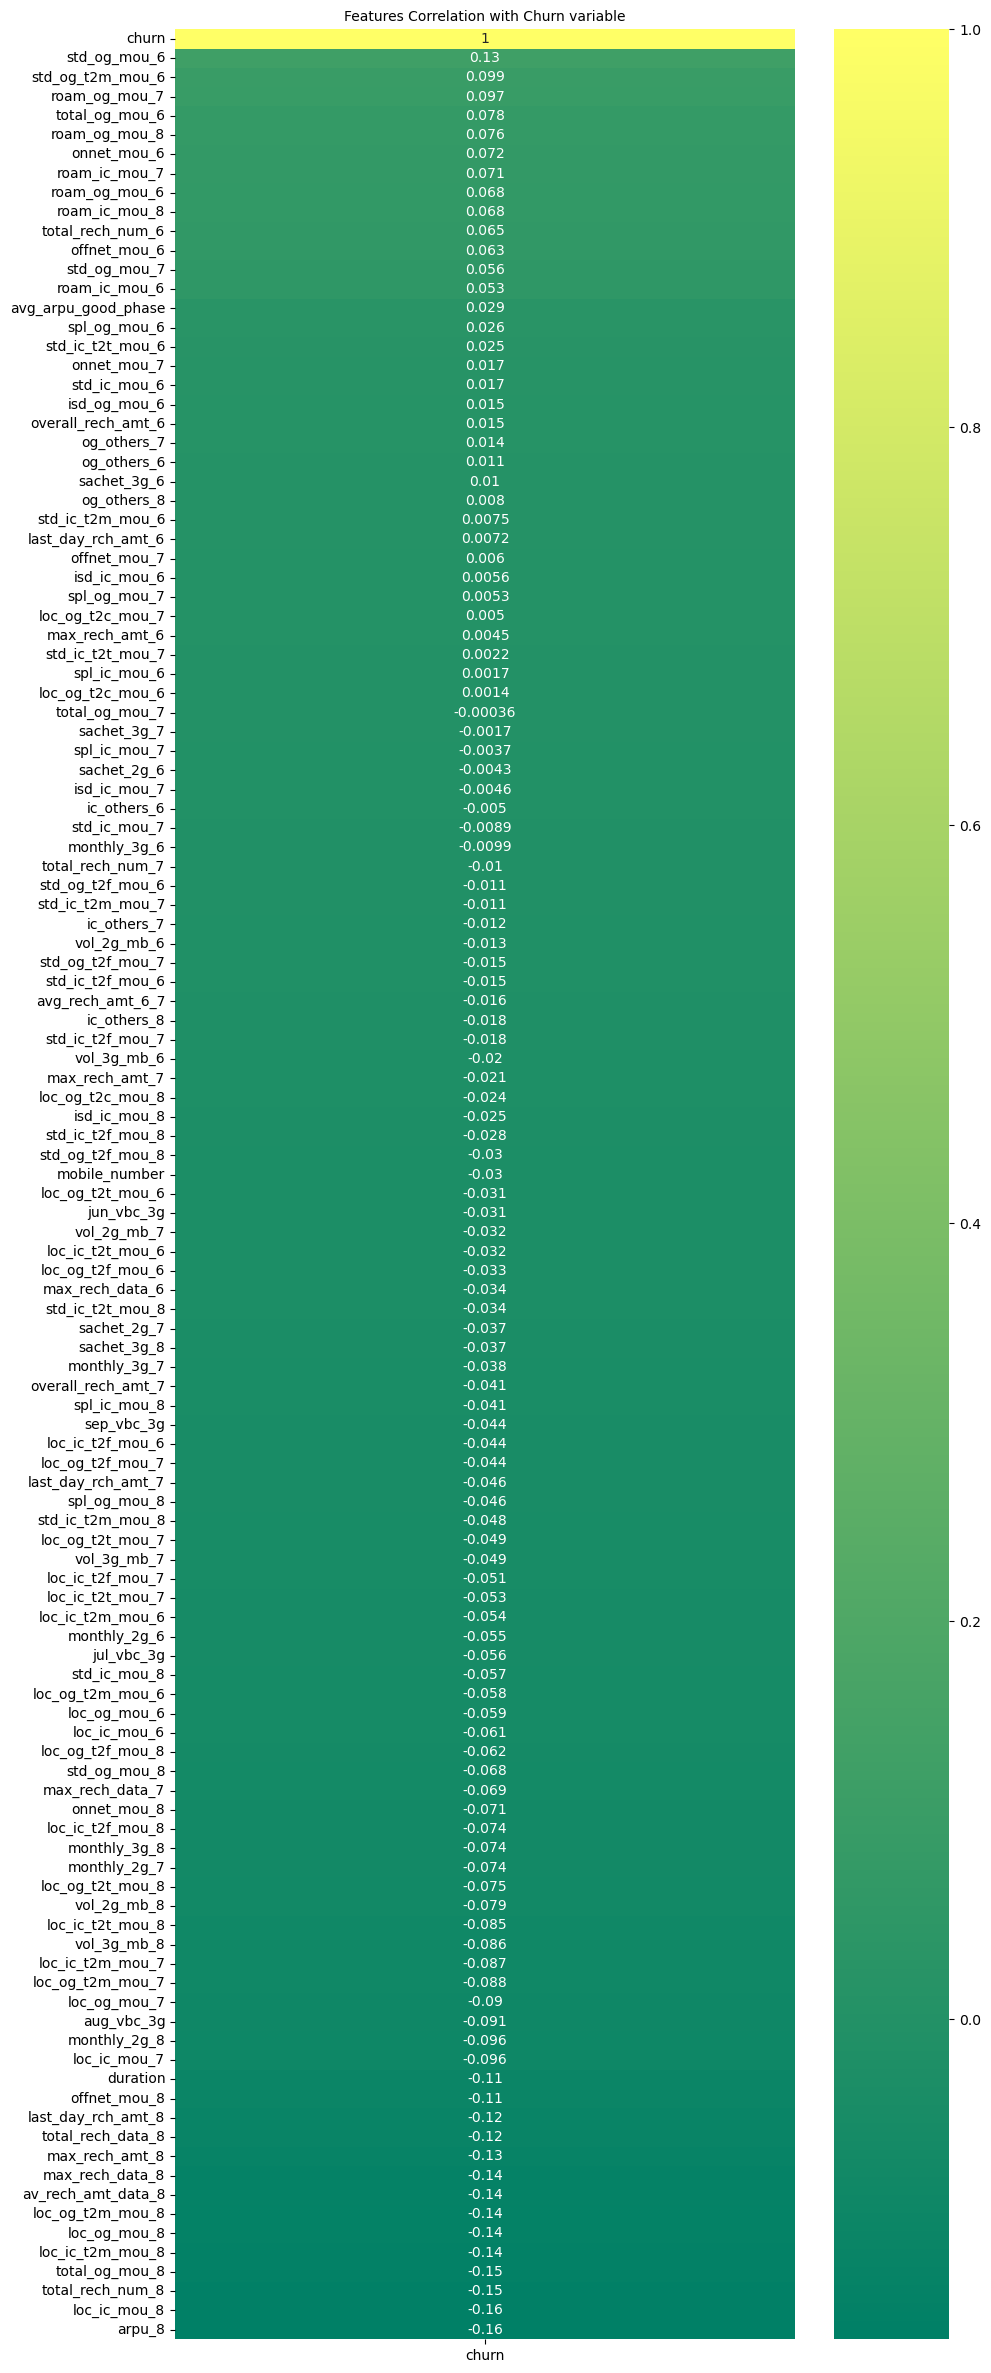

In [53]:
# Checking the correlation between target variable(churn) with the other variable in the dataset!

plt.figure(figsize=(10,30))
heatmap_churn = sns.heatmap(df.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlation with Churn variable", fontsize=10)

##### Avg Outgoing calls & calls on roaming for good phase is positively correlated with churn as this is the period a customer experiencing the network. 
##### Avg Revenue, No. of recharge for 8th month has a negative correlation with churn since customers who want to opt out might spent less during the action phase and vice versa for customers who retains the network.

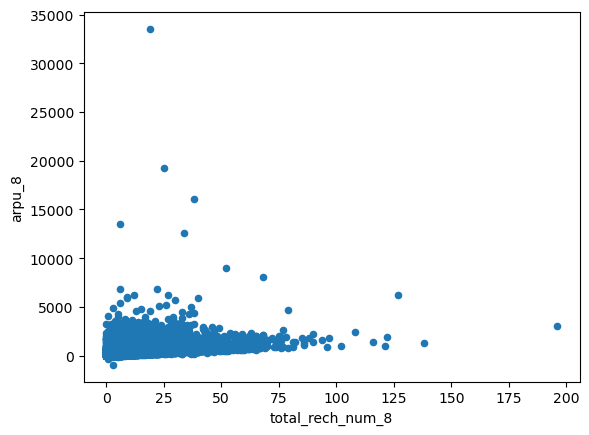

In [54]:
# lets draw a scatter plot between total recharge and avg revenue for the 8th month
df[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8', y='arpu_8')
plt.show()

##### We can see that most of the values are around zero which show their susceptibility towards churn. Since this is negatively correlated with churn people having more number of recharge have less chnace of opting out.
 

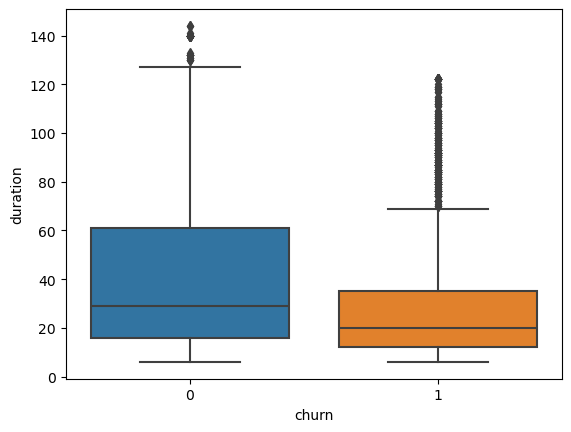

In [55]:
sns.boxplot(x = df.churn, y= df.duration)
plt.show()

##### Clearly people with lessar duration are more likly to churn therefore these should be targeted with better offers to retain them.
##### Customers need to be monitored during action phase as this is the period which shows customers clear intent to churn.

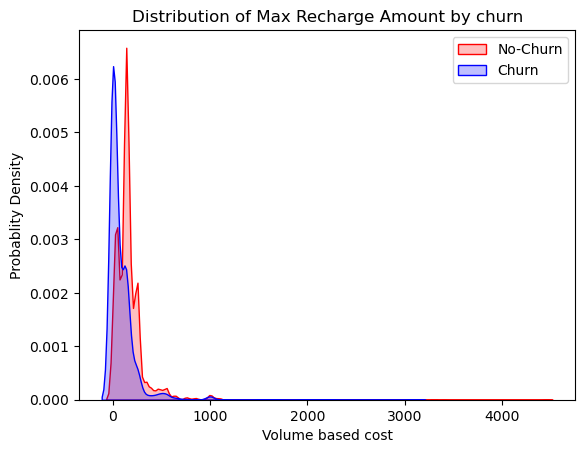

In [56]:
# Churn vs Max recharge amount

ax = sns.kdeplot(df.max_rech_amt_8[(df["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df.max_rech_amt_8[(df["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Probablity Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')
plt.show()

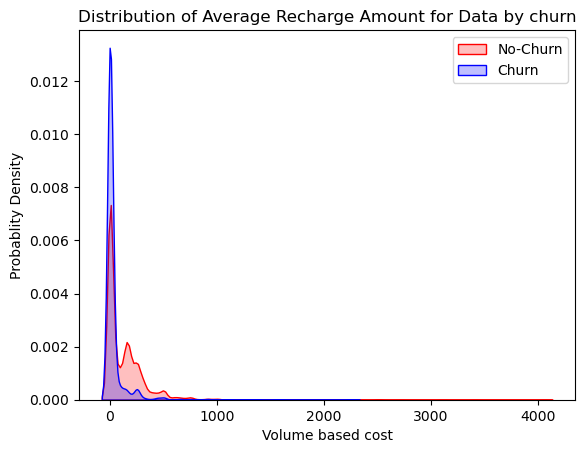

In [57]:
# Churn vs Average recharge amount

ax = sns.kdeplot(df.av_rech_amt_data_8[(df["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df.av_rech_amt_data_8[(df["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Probablity Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Average Recharge Amount for Data by churn')
plt.show()

##### From the above two Kernel density estimation plots we can visualise that customers with less expendtiure or volume during 8th month are more probable to churn. This helps us to define our target segment which requires aggresive retention strategy.

In [58]:
df['churn'] = df['churn'].astype(str)

In [59]:
# Creating categories for totalrecharge and their count (month 8)
df['total_rech_data_group_8']=pd.cut(df['total_rech_data_8'],[-1,0,10,25,100],
                                     labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
df['total_rech_num_group_8']=pd.cut(df['total_rech_num_8'],[-1,0,10,25,1000],
                                    labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

					Distribution of total_rech_data_8 variable
 total_rech_data_group_8
<=10_Recharges     15307
No_Recharge        14048
10-25_Recharges      608
>25_Recharges         38
Name: count, dtype: int64


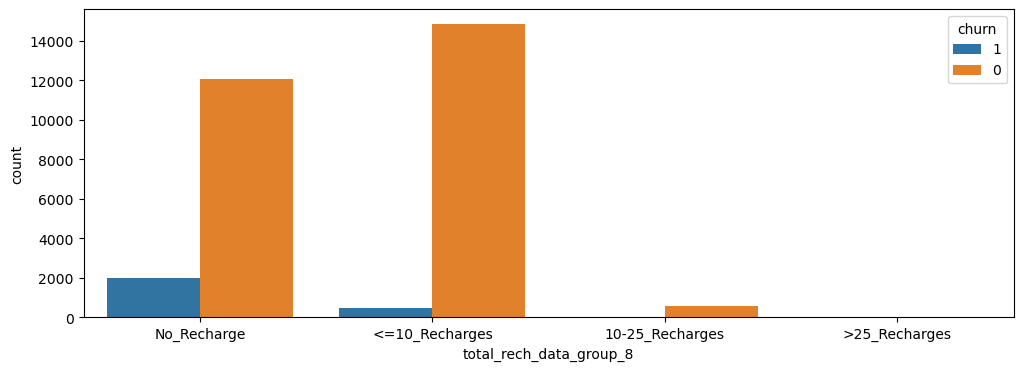

					Distribution of total_rech_num_8 variable
 total_rech_num_group_8
<=10_Recharges     19932
10-25_Recharges     8245
>25_Recharges       1824
No_Recharge            0
Name: count, dtype: int64


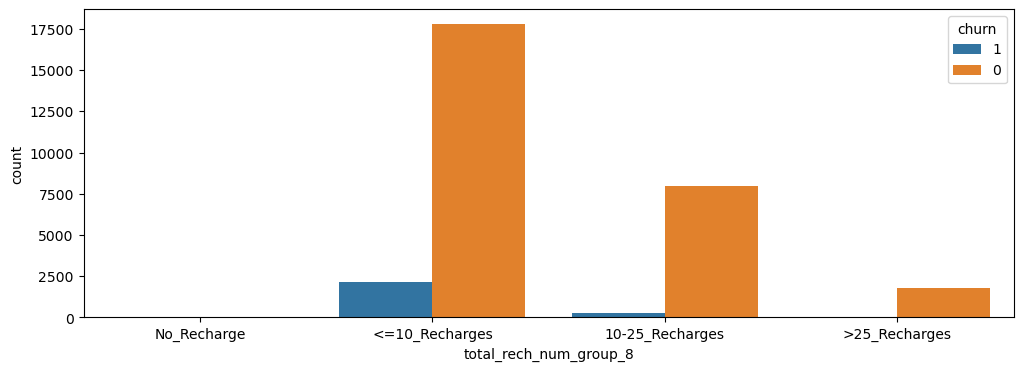

In [60]:
# Plotting the above changes
plt.figure(figsize=[12,4])
sns.countplot(data=df,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8 variable\n",df['total_rech_data_group_8'].value_counts())
plt.show()

plt.figure(figsize=[12,4])
sns.countplot(data=df,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 variable\n",df['total_rech_num_group_8'].value_counts())
plt.show()

##### Clearly when the number of recharge rate goes up, the churn rate decreases

### Preparing data for Modelling

In [61]:
new_df['duration_range'].value_counts()

duration_range
2-5 Yrs            9376
1-2 Yrs            7789
6-12 Months        5119
0-6 Months          478
5 Yrs and above     111
Name: count, dtype: int64

In [62]:
# Adding the earlier derived catagorical column to our original dataframe
df = pd.concat([df, new_df['duration_range']], axis=1)

In [63]:
# Creating dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df[['total_rech_data_group_8','total_rech_num_group_8','duration_range']], 
                       dtype= np.uint8,
                       drop_first=True)
dummy.head()

,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,duration_range_6-12 Months,duration_range_1-2 Yrs,duration_range_2-5 Yrs,duration_range_5 Yrs and above
0,1,0,0,1,0,0,0,0,1,0
7,0,0,0,1,0,0,0,0,1,0
8,1,0,0,0,1,0,1,0,0,0
21,0,0,0,0,0,1,0,1,0,0
23,1,0,0,1,0,0,0,1,0,0


In [64]:
# Adding the result to original dataframe

df = pd.concat([df, dummy], axis=1)
df.head()

,mobile_number,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,duration,avg_arpu_good_phase,total_rech_data_group_8,total_rech_num_group_8,duration_range,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,duration_range_6-12 Months,duration_range_1-2 Yrs,duration_range_2-5 Yrs,duration_range_5 Yrs and above
0,7.000843e+09,213.803,6.376667,1.336667,-2.842171e-14,0.553333,0.00,0.00,-3.552714e-15,0.00,0.00,0.293333,0.00,0.00,6.376667,1.336667,0.00,0.00,0.00,0.00,0.22,0.00,0.00,-2.220446e-16,0.0,0.00,6.596667,1.336667,0.00,0.003333,-2.220446e-16,-2.220446e-16,0.00,0.003333,-5.684342e-14,0.00,0.0,0.033333,0.0,0.00,1.716667,0.0,0.0,0.00,0.00,0.00,0.00,0.02,0.16,0.57,4.003333,4.13,0.00,0.00,1.15,0.57,4.026667,5.44,0.00,0.143333,0.00,-3.552714e-15,-3.552714e-15,3.552714e-15,0.00,4.440892e-16,0.00,0.00,0.143333,0.00,0.00,0.026667,0.0,0.00,0.00,0.00,0.046667,0.303333,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.000000e+00,252.0,252.0,252.0,2.520000e+02,30.13,1.32,5.750000e+00,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.000000e+00,1.0,0.0,0.0,0.0,30.40,0.00,101.20,3.58,614.0,504.0,559.0,1,32.0,206.1005,<=10_Recharges,<=10_Recharges,2-5 Yrs,1,0,0,1,0,0,0,0,1,0
7,7.000702e+09,3171.480,57.840000,54.680000,5.229000e+01,453.430000,567.16,325.91,1.623000e+01,33.49,31.64,23.740000,12.59,38.06,51.390000,31.380000,40.28,308.63,447.38,162.28,62.13,55.14,53.23,-2.220446e-16,0.0,0.00,422.160000,533.910000,255.79,49.890000,6.660000e+00,2.008000e+01,16.68,60.860000,7.514000e+01,77.84,0.0,4.500000,0.0,6.50,0.000000,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.490000,121.19,152.16,101.46,39.53,427.88,355.230000,188.04,36.89,11.830000,30.39,9.144000e+01,1.269900e+02,1.413300e+02,52.19,3.424000e+01,22.21,180.54,173.080000,193.94,0.21,0.000000,0.0,2.06,14.53,31.59,15.740000,15.190000,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,-2.220446e-16,0.0,0.0,0.0,-1.421085e-14,0.00,0.00,1.421085e-14,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,-2.775558e-17,0.0,0.0,0.0,0.0,57.74,19.38,18.74,0.00,1580.0,790.0,1185.0,1,27.0,1209.5150,No_Recharge,<=10_Recharges,2-5 Yrs,0,0,0,1,0,0,0,0,1,0
8,7.001525e+09,137.362,413.690000,351.030000,3.508000e+01,9

In [65]:
df.shape

(30001, 133)

In [66]:
# Creating a copy of the filtered dataframe
df_mod = df[:].copy()

# Dropping unwanted columns
df_mod.drop(['duration_range','mobile_number','total_rech_data_group_8','total_rech_num_group_8','sep_vbc_3g','duration'], 
        axis=1, inplace=True)

In [67]:
# Confirming the changes
df_mod.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,churn,avg_arpu_good_phase,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,duration_range_6-12 Months,duration_range_1-2 Yrs,duration_range_2-5 Yrs,duration_range_5 Yrs and above
0,213.803,6.376667,1.336667,-2.842171e-14,0.553333,0.00,0.00,-3.552714e-15,0.00,0.00,0.293333,0.00,0.00,6.376667,1.336667,0.00,0.00,0.00,0.00,0.22,0.00,0.00,-2.220446e-16,0.0,0.00,6.596667,1.336667,0.00,0.003333,-2.220446e-16,-2.220446e-16,0.00,0.003333,-5.684342e-14,0.00,0.0,0.033333,0.0,0.00,1.716667,0.0,0.0,0.00,0.00,0.00,0.00,0.02,0.16,0.57,4.003333,4.13,0.00,0.00,1.15,0.57,4.026667,5.44,0.00,0.143333,0.00,-3.552714e-15,-3.552714e-15,3.552714e-15,0.00,4.440892e-16,0.00,0.00,0.143333,0.00,0.00,0.026667,0.0,0.00,0.00,0.00,0.046667,0.303333,0.00,4.0,3.0,2.0,252.0,252.0,252.0,252.0,252.0,252.0,1.000000e+00,252.0,252.0,252.0,2.520000e+02,30.13,1.32,5.750000e+00,83.57,150.76,109.61,0.0,0.0,0.0,0.0,0.0,1.0,1.000000e+00,1.0,0.0,0.0,0.0,30.40,0.00,101.20,614.0,504.0,559.0,1,206.1005,1,0,0,1,0,0,0,0,1,0
7,3171.480,57.840000,54.680000,5.229000e+01,453.430000,567.16,325.91,1.623000e+01,33.49,31.64,23.740000,12.59,38.06,51.390000,31.380000,40.28,308.63,447.38,162.28,62.13,55.14,53.23,-2.220446e-16,0.0,0.00,422.160000,533.910000,255.79,49.890000,6.660000e+00,2.008000e+01,16.68,60.860000,7.514000e+01,77.84,0.0,4.500000,0.0,6.50,0.000000,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.490000,121.19,152.16,101.46,39.53,427.88,355.230000,188.04,36.89,11.830000,30.39,9.144000e+01,1.269900e+02,1.413300e+02,52.19,3.424000e+01,22.21,180.54,173.080000,193.94,0.21,0.000000,0.0,2.06,14.53,31.59,15.740000,15.190000,15.14,5.0,5.0,7.0,1580.0,790.0,1580.0,0.0,0.0,779.0,-2.220446e-16,0.0,0.0,0.0,-1.421085e-14,0.00,0.00,1.421085e-14,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,-2.775558e-17,0.0,0.0,0.0,0.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1,1209.5150,0,0,0,1,0,0,0,0,1,0
8,137.362,413.690000,351.030000,3.508000e+01,94.660000,80.63,136.48,0.000000e+00,0.00,0.00,0.000000,0.00,0.00,297.130000,217.590000,12.49,80.96,70.58,50.54,0.00,0.00,0.00,-2.220446e-16,0.0,7.15,378.090000,288.180000,63.04,13.690000,-2.220446e-16,-2.220446e-16,0.00,130.26000

In [68]:
# Creating independent dataset for model building

X = df_mod.drop(['churn'], axis=1)
y = df_mod.pop('churn')

In [69]:
# Spliting the dateset into train and test datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (21000, 126)
Dimension of X_test: (9001, 126)


In [70]:
# Separating the numerical columns from the dataset
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [71]:
# Applying standard scaler since dataset has outliers which might interfere with the analysis.
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])

In [72]:
# Apply scaling on test set as well

num_col_test = X_test.select_dtypes(include = ['int64', 'float64']).columns.tolist()
X_test[num_col_test] = scaler.fit_transform(X_test[num_col_test])
X_test.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_good_phase,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,duration_range_6-12 Months,duration_range_1-2 Yrs,duration_range_2-5 Yrs,duration_range_5 Yrs and above
35865,-0.815020,-0.236017,-0.561402,-0.507404,-0.719236,-0.743230,-0.718086,-0.208632,-0.161896,-0.164417,-0.231874,-0.203581,-0.182817,-0.364840,-0.371155,-0.349267,-0.603838,-0.685453,-0.651156,-0.261365,-0.282739,-0.325351,-0.245512,-0.190618,-0.22518,-0.637307,-0.699878,-0.654680,-0.404279,-0.157182,-0.137175,-0.147856,-0.292897,-0.563556,-0.506703,-0.037079,-0.318784,-0.065382,-0.348759,-0.104961,-0.013946,-0.015646,-0.618923,-0.864307,-0.790648,-0.394042,-0.370207,-0.421932,-0.638575,-0.677705,-0.636438,-0.326878,-0.345845,-0.276626,-0.701840,-0.719869,-0.703854,-0.192542,-0.178534,-0.180769,-0.219167,-0.290246,0.369461,-0.134299,-0.136035,-0.11678,-0.289277,-0.326480,0.114370,-0.428053,3.362139,-0.256491,-0.167794,-0.168318,-0.148328,-0.137556,-0.101442,-0.134803,-0.737597,-0.499740,-0.861014,-0.437701,-0.782948,-0.842022,-0.567125,-0.637852,-0.625830,-0.530321,-0.539309,-0.481107,-0.662474,-0.637680,-0.116844,0.599854,-0.339396,-0.390871,-0.391983,-0.398900,-0.391979,-0.407259,-0.377699,-0.039051,1.369396,-0.370143,-0.347566,-0.352330,-0.216401,-0.206752,-0.176754,-0.397345,-0.410246,-0.383062,-0.617126,-0.286352,-0.499473,-0.835853,0,0,0,1,0,0,1,0,0,0
41952,-0.311383,-0.484101,-0.473293,-0.462009,-0.581727,-0.288448,-0.489809,-0.208632,-0.161896,-0.164417,-0.231874,-0.203581,-0.182817,-0.194122,-0.244398,-0.251776,-0.663388,-0.626778,-0.569999,-0.261365,-0.224222,-0.304938,-0.245512,1.876268,-0.22518,-0.568592,-0.576926,-0.540483,-0.213058,0.104079,0.641693,-0.147856,-0.417655,-0.240287,-0.365440,-0.037079,-0.318784,0.714048,-0.348759,-0.104961,-0.013946,-0.015646,-0.690248,-0.487692,-0.608389,0.714990,1.521891,0.216063,-0.646627,-0.491100,-0.564631,-0.329608,-0.345845,-0.361747,-0.186551,0.339577,-0.354996,0.072247,0.642838,0.128969,0.710699,1.052425,0.024047,-0.134299,-0.136035,-0.11678,0.511180,1.087919,0.072615,-0.428053,-0.180252,-0.256491,-0.173516,0.207560,-0.148328,-0.137556,1.206272,-0.134803,-0.954920,-0.6070

In [73]:
X_train.head()

,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,overall_rech_amt_6,overall_rech_amt_7,avg_rech_amt_6_7,avg_arpu_good_phase,total_rech_data_group_8_<=10_Recharges,total_rech_data_group_8_10-25_Recharges,total_rech_data_group_8_>25_Recharges,total_rech_num_group_8_<=10_Recharges,total_rech_num_group_8_10-25_Recharges,total_rech_num_group_8_>25_Recharges,duration_range_6-12 Months,duration_range_1-2 Yrs,duration_range_2-5 Yrs,duration_range_5 Yrs and above
15709,-0.697469,-0.562645,-0.549648,-0.510597,-0.706424,-0.693649,-0.578412,-0.214784,-0.171758,-0.174971,-0.23022,-0.214856,-0.196911,-0.362669,-0.334014,-0.333138,-0.518565,-0.559116,-0.425436,-0.204433,-0.299977,-0.251461,-0.255099,0.465230,0.092321,-0.573115,-0.590042,-0.496310,-0.442855,-0.149786,-0.143666,-0.145781,-0.572853,-0.572834,-0.507238,-0.075599,-0.340900,-0.005133,-0.205537,-0.310060,-0.019807,-0.018487,-0.826899,-0.822586,-0.700605,-0.223159,-0.203011,-0.088717,-0.369553,-0.456765,-0.313258,-0.298459,-0.188986,-0.325961,-0.414891,-0.451492,-0.308194,-0.192883,-0.188463,-0.204053,-0.233589,-0.294204,-0.263772,-0.145696,-0.148749,-0.136893,-0.294298,-0.334224,-0.320832,-0.303157,-0.097583,-0.241768,-0.132710,-0.141758,-0.163950,-0.075162,-0.092031,-0.087177,-0.932161,-0.500547,-0.752131,-0.082026,-0.096249,-0.031216,0.383506,0.390016,0.432964,-0.209690,0.683335,0.656240,0.735710,0.161668,-0.278230,0.250716,0.243782,-0.370856,-0.410318,-0.376337,1.878701,1.815720,2.084470,-0.425732,0.290137,-0.348779,-0.347451,-0.337312,-0.210853,-0.209568,-0.187091,-0.403872,-0.400289,-0.379289,-0.445304,-0.201420,-0.385908,-0.955727,1,0,0,1,0,0,0,0,0,0
28202,-0.881701,-0.558510,-0.558725,-0.516256,-0.750760,-0.764299,-0.695657,-0.214784,-0.171758,-0.174971,-0.23022,-0.214856,-0.196911,-0.354218,-0.351847,-0.344391,-0.602157,-0.675342,-0.658047,-0.224676,-0.299977,-0.297215,-0.255099,-0.217531,-0.248902,-0.624912,-0.676053,-0.655282,-0.442855,-0.149786,-0.143666,-0.145781,-0.572853,-0.572834,-0.507238,-0.075599,-0.340900,-0.339181,-0.319347,-0.310060,-0.019807,-0.018487,-0.855121,-0.877887,-0.785854,0.092834,-0.158743,-0.299518,0.192865,-0.281589,-0.389941,0.155091,0.022950,-0.325961,0.203748,-0.275070,-0.472406,-0.192883,-0.188463,-0.204053,-0.292581,-0.294204,-0.263772,-0.145696,-0.035224,-0.136893,-0.336926,-0.320038,-0.320832,-0.303157,-0.097583,-0.241768,-0.132710,-0.141758,-0.163950,-0.075162,-0.092031,-0.087177,0.537793,0.

### Data imbalance handling

#### Using SMOTE method to balance the data w.r.t churn variable to prevent model bias

In [74]:
# Balancing train data
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [75]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (38576, 126)
Dimension of y_train_sm Shape: (38576,)


###  PCA

In [76]:
# Instantiate PCA
pca = PCA(random_state=42)

# Fit train set on PCA
pca.fit(X_train_sm)

PCA(random_state=42)

In [77]:
# Principal components
pca.components_

array([[ 1.13866961e-01,  1.83417441e-01,  1.77094255e-01, ...,
         1.80622226e-03,  5.47916585e-03, -5.85357172e-05],
       [ 1.75083396e-01, -4.71569833e-02, -1.09941928e-02, ...,
        -6.53979335e-03,  9.47563119e-03,  4.66758385e-04],
       [ 1.01112197e-01,  5.24808158e-03,  3.56173166e-03, ...,
        -7.38581738e-03, -2.18495512e-03, -1.84282248e-06],
       ...,
       [-5.20405091e-07,  6.35457256e-06, -5.85936588e-06, ...,
        -7.44512824e-08,  1.06176233e-07,  4.19290226e-07],
       [ 1.10764912e-07, -6.26829152e-06, -2.75058541e-07, ...,
         4.02507247e-07,  1.22389907e-07, -7.43021428e-07],
       [ 4.18110472e-16, -1.13666196e-15, -2.51723861e-15, ...,
         7.09736560e-17,  1.00999886e-16,  3.20437077e-16]])

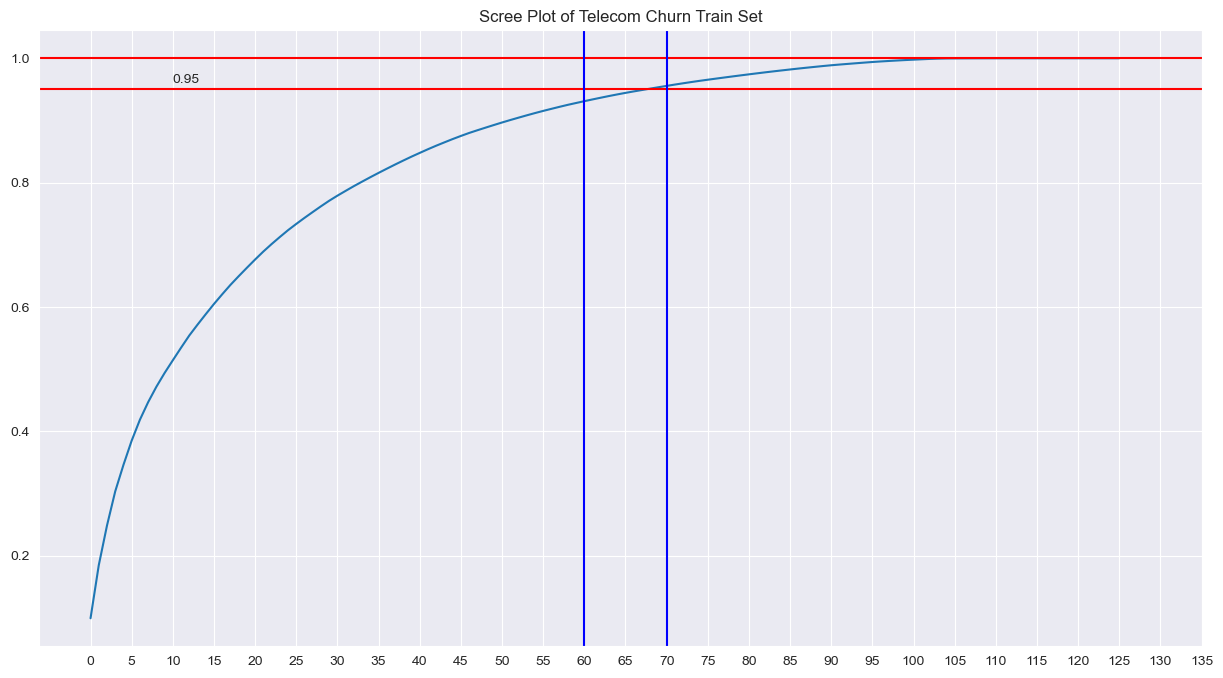

In [78]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.lineplot( var_cum)
plt.xticks(np.arange(0,140,5))
plt.axhline(0.95,color='r')
plt.axhline(1.0,color='r')
plt.axvline(60,color='b')
plt.axvline(70,color='b')
plt.text(10,0.96,'0.95')

plt.title('Scree Plot of Telecom Churn Train Set');

##### Clearly 60 components are able to explain more than 90% variance in the data

### PCA with 60 components

In [79]:
# Instantiate pca with 60 components
pca_final = IncrementalPCA(n_components=60)

# Fit and transform the X_train_sm
X_train_pca = pca_final.fit_transform(X_train_sm)

##### Applying transformation on the test set. 'fit_transform' isn't required as it is already done on train set and we need tranfromation without refitting.

In [80]:
# On test set
X_test_pca = pca_final.transform(X_test)

##### Since we are more concerned about Sensitivity/Recall than anything else a few non-churn customers predicted as churned won't bother much to the customer retntion team

### 1. Logistic regression with PCA

In [81]:
logreg = LogisticRegression(random_state=42)

In [82]:
logreg.fit(X_train_pca, y_train_sm)

LogisticRegression(random_state=42)

In [83]:
# Evaluating the model
y_train_pred = logreg.predict(X_train_pca)

In [84]:
accuracy_score(y_train_sm, y_train_pred)

0.8455516383243468

In [85]:
confusion_matrix(y_train_sm, y_train_pred)

array([[15915,  3373],
       [ 2585, 16703]])

##### Train set Evaluation

In [86]:
print(classification_report(y_train_sm, y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84     19288
           1       0.83      0.87      0.85     19288

    accuracy                           0.85     38576
   macro avg       0.85      0.85      0.85     38576
weighted avg       0.85      0.85      0.85     38576



In [87]:
y_test_pred = logreg.predict(X_test_pca)

In [88]:
accuracy_score(y_test, y_test_pred)

0.8183535162759693

##### Test set Evaluation

In [89]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8272
           1       0.28      0.81      0.42       729

    accuracy                           0.82      9001
   macro avg       0.63      0.81      0.66      9001
weighted avg       0.92      0.82      0.85      9001



##### Getting Recall value as 87% on train set and 81% on test set seems pretty decent. Model's accuracy is also 85% on training set and 82% on test set looks decent.

### 2. Random Forest with PCA

In [90]:
# Runing the base model with 13 trees will tune the parameters later
rfc = RandomForestClassifier(n_estimators=13)
rfc.fit(X_train_pca, y_train_sm)

RandomForestClassifier(n_estimators=13)

In [91]:
# Making predictions on it
predictions = rfc.predict(X_test_pca)

# Showing classification report 
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      8272
           1       0.40      0.49      0.44       729

    accuracy                           0.90      9001
   macro avg       0.68      0.71      0.69      9001
weighted avg       0.91      0.90      0.90      9001



#### Hyperparameter tuning to find the optimal model

In [93]:
#Create the parameter grid based on the results of random search 
param_grid= {
    'max_depth': range(5,10,5),
    'min_samples_leaf': [50,100,150],
    'min_samples_split': [50,100,150],
    'n_estimators': [10,20,30], 
    'max_features': [10,20,30]
}
#Create a based model
rf= RandomForestClassifier()

#Instantiate the grid search model
grid_search= GridSearchCV(estimator= rf, 
                          param_grid= param_grid, 
                          cv= 3, 
                          n_jobs= -1,
                          verbose= 1)

In [94]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_sm)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5),
                         'max_features': [10, 20, 30],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [10, 20, 30]},
             verbose=1)

In [95]:
# Providing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8296349851601458 using {'max_depth': 5, 'max_features': 30, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 20}


In [96]:
# Model with the best hyperparameters
rf_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=30,
                             n_estimators=20)
# Fit the model
rf_model.fit(X_train_pca, y_train_sm)

RandomForestClassifier(max_depth=5, max_features=30, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=20)

In [97]:
# Predictions on the train set
y_train_pred = rf_model.predict(X_test_pca)

In [98]:
# Printing report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      8272
           1       0.40      0.49      0.44       729

    accuracy                           0.90      9001
   macro avg       0.68      0.71      0.69      9001
weighted avg       0.91      0.90      0.90      9001



##### When using Random forest classifier we got sensitivty of 49% on test. Whereas accuracy on training set is 82.9% and on test set 90%. Since we are more concerned about recall or sensitivity we have to let go of this model. 

### 3. Decision tree with PCA

In [99]:
dtree = DecisionTreeClassifier(max_depth=5)
dtree.fit(X_train_pca, y_train_sm)

DecisionTreeClassifier(max_depth=5)

In [100]:
# Making predictions
y_pred_dtree = dtree.predict(X_test_pca)

# Printing classification report
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       0.97      0.79      0.87      8272
           1       0.23      0.74      0.35       729

    accuracy                           0.78      9001
   macro avg       0.60      0.76      0.61      9001
weighted avg       0.91      0.78      0.83      9001



In [101]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_dtree))
print(accuracy_score(y_test,y_pred_dtree))

[[6509 1763]
 [ 192  537]]
0.782801910898789


#### Hyperparameter tuning

In [102]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = n_folds, verbose = 1)

# Fitting the grid search to the data
grid_search.fit(X_train_pca,y_train_sm)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [103]:
#CV results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.544279,0.009176,0.012235,0.000816,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.804951,0.816721,0.796241,0.807777,0.812573,0.807652,0.006985,9
1,1.546813,0.012748,0.011899,0.000579,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.804951,0.816721,0.796241,0.807777,0.812573,0.807652,0.006985,9
2,1.535646,0.010548,0.011628,0.000415,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.804044,0.815943,0.796241,0.806610,0.812054,0.806979,0.006785,11
3,1.541754,0.016271,0.012212,0.000504,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.804044,0.815943,0.796241,0.806610,0.812054,0.806979,0.006785,11
4,2.584471,0.134003,0.012739,0.000773,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.830353,0.841996,0.841607,0.838756,0.831497,0.836842,0.004972,4


In [104]:
# Printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8390710333494937
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [106]:
# Model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion= "gini", 
                                  random_state= 100, 
                                  max_depth= 10, 
                                  min_samples_leaf= 50, 
                                  min_samples_split= 50)
clf_gini.fit(X_train_pca, y_train_sm)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [107]:
y_pred_dt = clf_gini.predict(X_test_pca)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      8272
           1       0.27      0.65      0.38       729

    accuracy                           0.83      9001
   macro avg       0.62      0.75      0.64      9001
weighted avg       0.91      0.83      0.86      9001



##### We get recall value of 65% for churn customers and accuracy of 83%. Although it is working better than random forest but still logistic regression seems to work at par with these models. Therefore Logistic regression seems to be the best choice and also it holds better interpretability.

### Logistic regression without PCA for finding attributes which are important for customer retention

In [114]:
import statsmodels.api as sma

In [112]:
X_train_sm.shape

(38576, 126)

In [113]:
y_train_sm.shape

(38576,)

In [121]:
# Changing the dtype
df_float = X_train_sm.astype(np.float64)

In [124]:
# Changing the dtype
dfy_float = y_train_sm.astype(np.float64)

In [126]:
# Logistic regression model
logm1 = sma.GLM(dfy_float,(sma.add_constant(df_float)), family = sma.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38450
Model Family:                Binomial   Df Model:                          125
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10032.
Date:                Tue, 07 May 2024   Deviance:                       20064.
Time:                        18:53:04   Pearson chi2:                 1.89e+14
No. Iterations:                   100   Pseudo R-squ. (CS):             0.5794
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      57.5676   1.58e+06   3.64e-05      1.000    -3.1e+06     3.1e+06
arpu_8                                      0.1198      0.064      1.870      0.062      -0.006       0.245
onnet_mou_6                                -2.9952      2.138     -1.401      0.161      -7.186       1.196
onnet_mou_7                                 2.4439      1.207      2.025      0.043       0.079       4.809
onnet_mou_8                                13.6281      1.408      9.677      0.000      10.868      16.388
offnet_mou_6                               -2.7481      2.241     -1.226      0.220      -7.140       1.643
offnet_mou_7                                2.6493      1.261      2.101      0.036       0.177       5.121
offnet_mou_8                               14.6552      1.521      9.633      0.000      11.674      17.637
roam_ic_mou_6                               0.0500      0.029      1.734      0.083      -0.007       0.107
roam_ic_mou_7                               0.0711      0.029      2.425      0.015       0.014       0.129
roam_ic_mou_8                              -0.0356      0.021     -1.717      0.086      -0.076       0.005
roam_og_mou_6                               0.6460      0.546      1.184      0.236      -0.423       1.715
roam_og_mou_7                              -0.4278      0.239     -1.791      0.073      -0.896       0.040
roam_og_mou_8                              -3.0928      0.321     -9.623      0.000      -3.723      -2.463
loc_og_t2t_mou_6                          -13.2265    832.655     -0.016      0.987   -1645.200    1618.746
loc_og_t2t_mou_7                        -1755.8643    891.979     -1.969      0.049   -3504.111      -7.617
loc_og_t2t_mou_8                         5976.8928    880.351      6.789      0.000    4251.436    7702.349
loc_og_t2m_mou_6                          -15.0107    932.152     -0.016      0.987   -1841.996    1811.974
loc_og_t2m_mou_7                        -1755.5462    891.650     -1.969      0.049   -3503.149      -7.944
loc_og_t2m_mou_8                         6108.0378    899.637      6.789      0.000    4344.783    7871.293
loc_og_t2f_mou_6                           -1.2442     76.443     -0.016      0.987    -151.070     148.582
loc_og_t2f_mou_7                         -154.9039     78.494     -1.973      0.048    -308.750      -1.058
loc_og_t2f_mou_8                          522.6704     76.967      6.791      0.000     371.817     673.524
loc_og_t2c_mou_6                           -0.1263      0.030     -4.277      0.000      -0.184      -0.068
loc_og_t2c_mou_7                           -0.0381      0.041     -0.931      0.352      -0.118       0.042
loc_og_t2c_mou_8                           -0.0006      0.0

In [130]:
lgr = LogisticRegression()
# Runing RFE with 15 variables initially
rfe = RFE(lgr,n_features_to_select=15)
rfe = rfe.fit(df_float, dfy_float)

In [131]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [132]:
list(zip(df_float.columns, rfe.support_, rfe.ranking_))

[('arpu_8', False, 110),
 ('onnet_mou_6', False, 10),
 ('onnet_mou_7', False, 7),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 12),
 ('offnet_mou_7', False, 6),
 ('offnet_mou_8', False, 2),
 ('roam_ic_mou_6', False, 53),
 ('roam_ic_mou_7', False, 73),
 ('roam_ic_mou_8', False, 89),
 ('roam_og_mou_6', False, 13),
 ('roam_og_mou_7', False, 58),
 ('roam_og_mou_8', False, 3),
 ('loc_og_t2t_mou_6', False, 62),
 ('loc_og_t2t_mou_7', False, 71),
 ('loc_og_t2t_mou_8', False, 34),
 ('loc_og_t2m_mou_6', False, 85),
 ('loc_og_t2m_mou_7', False, 103),
 ('loc_og_t2m_mou_8', False, 35),
 ('loc_og_t2f_mou_6', False, 111),
 ('loc_og_t2f_mou_7', False, 14),
 ('loc_og_t2f_mou_8', False, 52),
 ('loc_og_t2c_mou_6', False, 48),
 ('loc_og_t2c_mou_7', False, 86),
 ('loc_og_t2c_mou_8', False, 109),
 ('loc_og_mou_6', False, 68),
 ('loc_og_mou_7', False, 80),
 ('loc_og_mou_8', False, 5),
 ('std_og_t2m_mou_6', False, 67),
 ('std_og_t2f_mou_6', False, 81),
 ('std_og_t2f_mou_7', False, 93),
 ('std_og_t2f_mo

In [138]:
col = df_float.columns[rfe.support_]
col

Index(['onnet_mou_8', 'std_og_mou_8', 'og_others_8', 'total_og_mou_8',
       'loc_ic_mou_8', 'total_rech_data_group_8_<=10_Recharges',
       'total_rech_data_group_8_10-25_Recharges',
       'total_rech_data_group_8_>25_Recharges',
       'total_rech_num_group_8_<=10_Recharges',
       'total_rech_num_group_8_10-25_Recharges',
       'total_rech_num_group_8_>25_Recharges', 'duration_range_6-12 Months',
       'duration_range_1-2 Yrs', 'duration_range_2-5 Yrs',
       'duration_range_5 Yrs and above'],
      dtype='object')

In [140]:
# Runing the model with RFE selected variables
df_float_sm = sma.add_constant(df_float[col])
logm2 = sma.GLM(dfy_float,df_float_sm, family = sma.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38560
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12370.
Date:                Tue, 07 May 2024   Deviance:                       24739.
Time:                        19:12:05   Pearson chi2:                 7.67e+10
No. Iterations:                    26   Pseudo R-squ. (CS):             0.5253
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      42.2784   1.48e+04      0.003      0.998    -2.9e+04    2.91e+04
onnet_mou_8                                 0.1910      0.039      4.934      0.000       0.115       0.267
std_og_mou_8                                3.6991      0.118     31.336      0.000       3.468       3.930
og_others_8                                -2.0579      0.718     -2.865      0.004      -3.466      -0.650
total_og_mou_8                             -5.0684      0.128    -39.444      0.000      -5.320      -4.817
loc_ic_mou_8                               -1.4183      0.057    -24.933      0.000      -1.530      -1.307
total_rech_data_group_8_<=10_Recharges     -2.5806      0.038    -67.861      0.000      -2.655      -2.506
total_rech_data_group_8_10-25_Recharges    -5.5069      0.714     -7.713      0.000      -6.906      -4.107
total_rech_data_group_8_>25_Recharges      -3.0338      1.056     -2.872      0.004      -5.104      -0.963
total_rech_num_group_8_<=10_Recharges     -42.1297   1.48e+04     -0.003      0.998   -2.91e+04     2.9e+04
total_rech_num_group_8_10-25_Recharges    -42.7790   1.48e+04     -0.003      0.998   -2.91e+04     2.9e+04
total_rech_num_group_8_>25_Recharges      -43.7494   1.48e+04     -0.003      0.998   -2.91e+04     2.9e+04
duration_range_6-12 Months                 -1.7947      0.050    -35.952      0.000      -1.893      -1.697
duration_range_1-2 Yrs                     -1.6750      0.045    -37.610      0.000      -1.762      -1.588
duration_range_2-5 Yrs                     -1.9207      0.044    -43.235      0.000      -2.008      -1.834
duration_range_5 Yrs and above             -3.5639      0.526     -6.782      0.000      -4.594      -2.534
===========================================================================================================
"""

In [147]:
# Dropping few variables with high p value
col = col.drop('total_rech_num_group_8_<=10_Recharges')

In [151]:
col = col.drop('total_rech_num_group_8_10-25_Recharges')

In [153]:
# Runing another model with reduced variables
df_float_sm = sma.add_constant(df_float[col])
logm3 = sma.GLM(dfy_float,df_float_sm, family = sma.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38562
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14036.
Date:                Tue, 07 May 2024   Deviance:                       28072.
Time:                        19:40:28   Pearson chi2:                 9.05e+08
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4824
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.5031      0.034     14.986      0.000       0.437       0.569
onnet_mou_8                                 0.1809      0.032      5.717      0.000       0.119       0.243
std_og_mou_8                                2.8172      0.095     29.583      0.000       2.631       3.004
og_others_8                                -1.6698      0.596     -2.803      0.005      -2.837      -0.502
total_og_mou_8                             -3.9529      0.104    -38.191      0.000      -4.156      -3.750
loc_ic_mou_8                               -1.4757      0.051    -28.680      0.000      -1.577      -1.375
total_rech_data_group_8_<=10_Recharges     -2.5131      0.035    -71.602      0.000      -2.582      -2.444
total_rech_data_group_8_10-25_Recharges    -6.0500      0.713     -8.487      0.000      -7.447      -4.653
total_rech_data_group_8_>25_Recharges      -2.9030      1.057     -2.746      0.006      -4.975      -0.831
total_rech_num_group_8_>25_Recharges       -1.7959      0.139    -12.960      0.000      -2.067      -1.524
duration_range_6-12 Months                 -1.8680      0.047    -39.746      0.000      -1.960      -1.776
duration_range_1-2 Yrs                     -1.7448      0.042    -41.961      0.000      -1.826      -1.663
duration_range_2-5 Yrs                     -1.9368      0.041    -46.951      0.000      -2.018      -1.856
duration_range_5 Yrs and above             -3.6879      0.512     -7.197      0.000      -4.692      -2.684
===========================================================================================================
"""

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = df_float[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(df_float[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_og_mou_8,5.89
1,std_og_mou_8,4.61
0,onnet_mou_8,2.12
5,total_rech_data_group_8_<=10_Recharges,1.68
11,duration_range_2-5 Yrs,1.30
4,loc_ic_mou_8,1.28
10,duration_range_1-2 Yrs,1.27
8,total_rech_num_group_8_>25_Recharges,1.21
9,duration_range_6-12 Months,1.18
6,total_rech_data_group_8_10-25_Recharges,1.08


##### dropping 'total_og_mou_8' as it has high VIF

In [155]:
# Dropping
col = col.drop('total_og_mou_8')
len(col)

12

In [156]:
# Rerunning the model with final variables
df_float_sm = sma.add_constant(df_float[col])
logm3 = sma.GLM(dfy_float,df_float_sm, family = sma.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38576
Model:                            GLM   Df Residuals:                    38563
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15092.
Date:                Tue, 07 May 2024   Deviance:                       30185.
Time:                        19:44:48   Pearson chi2:                 2.20e+05
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4533
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.6663      0.031     21.505      0.000       0.606       0.727
onnet_mou_8                                -0.0887      0.028     -3.185      0.001      -0.143      -0.034
std_og_mou_8                               -0.4946      0.028    -17.741      0.000      -0.549      -0.440
og_others_8                                -1.8510      0.558     -3.317      0.001      -2.944      -0.757
loc_ic_mou_8                               -2.8333      0.045    -62.438      0.000      -2.922      -2.744
total_rech_data_group_8_<=10_Recharges     -2.4934      0.034    -73.404      0.000      -2.560      -2.427
total_rech_data_group_8_10-25_Recharges    -5.8805      0.713     -8.252      0.000      -7.277      -4.484
total_rech_data_group_8_>25_Recharges      -2.6767      1.055     -2.537      0.011      -4.745      -0.609
total_rech_num_group_8_>25_Recharges       -1.9156      0.135    -14.203      0.000      -2.180      -1.651
duration_range_6-12 Months                 -1.7318      0.045    -38.687      0.000      -1.820      -1.644
duration_range_1-2 Yrs                     -1.6139      0.040    -40.728      0.000      -1.692      -1.536
duration_range_2-5 Yrs                     -1.8405      0.039    -46.990      0.000      -1.917      -1.764
duration_range_5 Yrs and above             -3.6406      0.502     -7.249      0.000      -4.625      -2.656
===========================================================================================================
"""

In [157]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = df_float[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(df_float[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,std_og_mou_8,1.77
0,onnet_mou_8,1.68
4,total_rech_data_group_8_<=10_Recharges,1.68
10,duration_range_2-5 Yrs,1.30
9,duration_range_1-2 Yrs,1.27
7,total_rech_num_group_8_>25_Recharges,1.20
8,duration_range_6-12 Months,1.18
5,total_rech_data_group_8_10-25_Recharges,1.08
3,loc_ic_mou_8,1.05
6,total_rech_data_group_8_>25_Recharges,1.02


In [ ]:
#### After doing logistic regression we have found the variables which will help customer retention team
